In [1]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.models import Model
from keras.applications import VGG16
from keras.preprocessing import image
from keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Activation
import keras.backend as K
from keras import optimizers
import h5py
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import keras
from keras.layers import Conv3D, MaxPooling3D, UpSampling3D, Activation, BatchNormalization, PReLU, Deconvolution3D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.utils import plot_model
%matplotlib inline

Using TensorFlow backend.


In [2]:
from keras.models import load_model

In [3]:
#model = load_model('./wazirtrainingscale2.h5') 

In [4]:
#model.summary()

In [5]:
#SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [6]:
#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(256,256, 3))

In [7]:
# Freeze the layers except the last 4 layers
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False
# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7fd5780ce7b8> False
<keras.layers.convolutional.Conv2D object at 0x7fd5780cea90> False
<keras.layers.convolutional.Conv2D object at 0x7fd5780ceb38> False
<keras.layers.pooling.MaxPooling2D object at 0x7fd57808a7f0> False
<keras.layers.convolutional.Conv2D object at 0x7fd5780a6c18> False
<keras.layers.convolutional.Conv2D object at 0x7fd578038ba8> False
<keras.layers.pooling.MaxPooling2D object at 0x7fd578066630> False
<keras.layers.convolutional.Conv2D object at 0x7fd577dcc978> False
<keras.layers.convolutional.Conv2D object at 0x7fd577de5908> False
<keras.layers.convolutional.Conv2D object at 0x7fd577d91320> False
<keras.layers.pooling.MaxPooling2D object at 0x7fd577da9eb8> False
<keras.layers.convolutional.Conv2D object at 0x7fd577dbd7f0> False
<keras.layers.convolutional.Conv2D object at 0x7fd577d69208> False
<keras.layers.convolutional.Conv2D object at 0x7fd577d7ec88> False
<keras.layers.pooling.MaxPooling2D object at 0x7fd577d2b940>

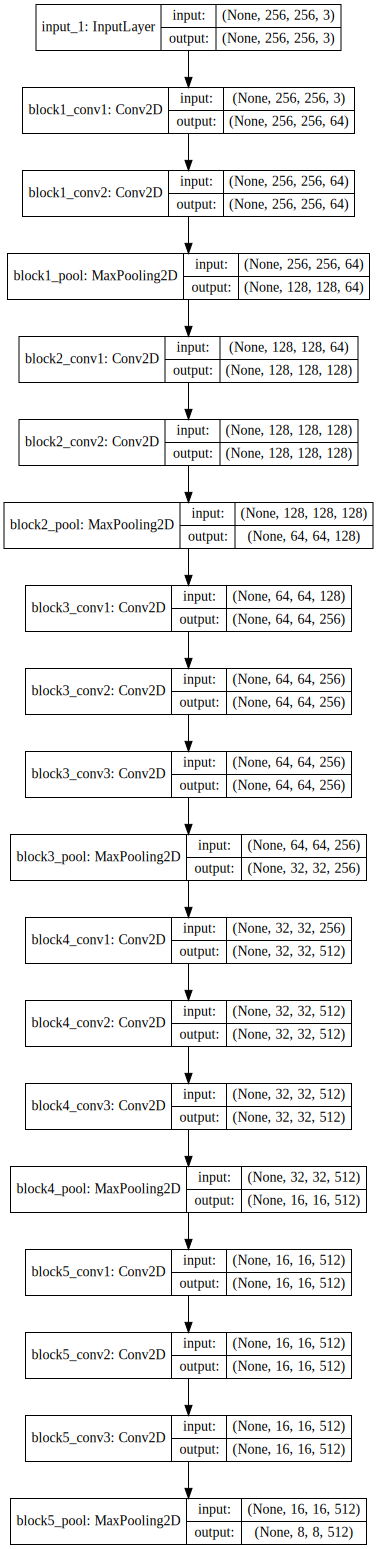

In [8]:
SVG(model_to_dot(vgg_conv, show_shapes=True).create(prog='dot', format='svg'))

In [9]:
vgg_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0         
__________

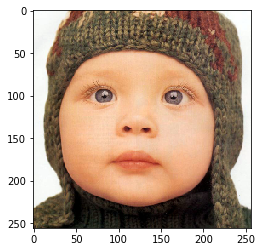

In [10]:
lena = image.load_img("./baby_GT.png", target_size=(256,256))
plt.imshow(lena)
lena = image.img_to_array(lena)
lena = np.expand_dims(lena, axis=0)
lena = preprocess_input(lena)

In [11]:
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)

In [12]:
model = Model(input=vgg_conv.input, output=vgg_conv.get_layer('block1_pool').output)
model.compile(optimizer=sgd, loss='categorical_crossentropy')
block1_pool_features = model.predict(lena)
block1_pool_features.shape

/home/wazir/.virtualenvs/wazir/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("bl...)`
  """Entry point for launching an IPython kernel.


(1, 128, 128, 64)

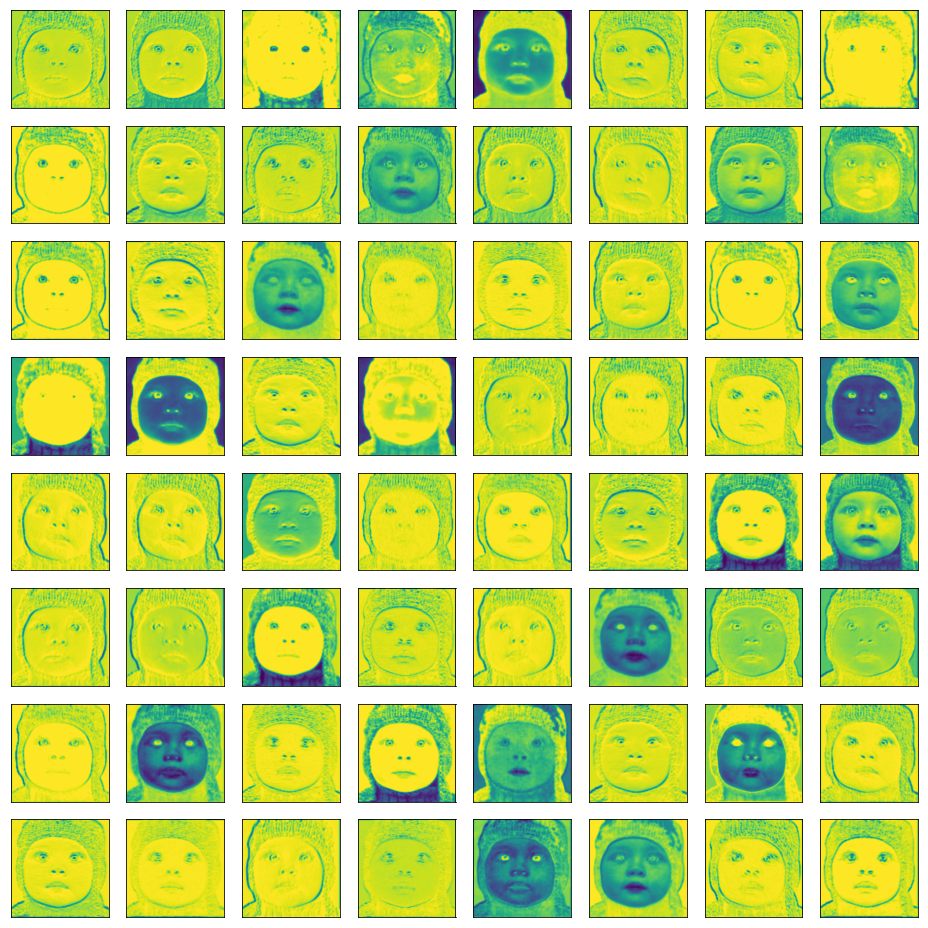

In [13]:
fig, axes = plt.subplots(8, 8, figsize=(13, 13))
axes = np.ravel(axes)
for i in range(block1_pool_features.shape[3]):
    axes[i].imshow(255-block1_pool_features[0, :, :, i], interpolation="bicubic")
    axes[i].set_xticks([])
    axes[i].set_yticks([])
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()

In [14]:
model = Model(input=vgg_conv.input, 
              output=vgg_conv.get_layer('block2_pool').output)
model.compile(optimizer=sgd, loss='categorical_crossentropy')

block2_pool_features = model.predict(lena)
block2_pool_features.shape

/home/wazir/.virtualenvs/wazir/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("bl...)`
  


(1, 64, 64, 128)

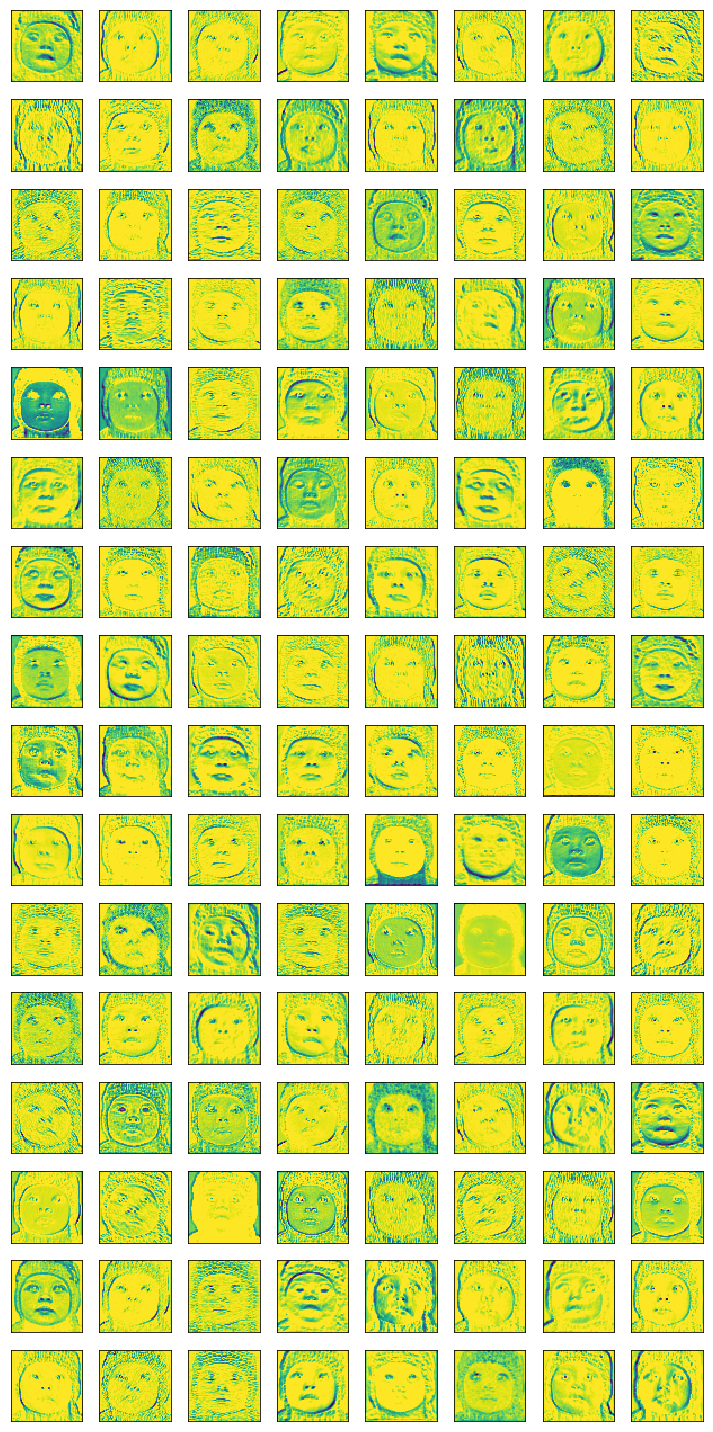

In [15]:
fig, axes = plt.subplots(16, 8, figsize=(10, 20))
axes = np.ravel(axes)
for i in range(block2_pool_features.shape[3]):
    axes[i].imshow(255-block2_pool_features[0, :, :, i], interpolation="nearest")
    axes[i].set_xticks([])
    axes[i].set_yticks([])
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()